# Loads

In [1]:
# Setting for Notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from IPython.display import HTML
from IPython.display import display
from IPython.display import Image

from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans

from skimage import io

import pandas as pd
from zipfile import ZipFile
from io import BytesIO
from urllib.request import urlopen

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Problem 1

### Statement of Problem:

Find the color-clusters using the k-means algorithm in scikit-learn for the above image. To create image something like the image below, how many clusters do you need for perfect reproduction?

### Solution:

For perfect reproduction of the original image, one needs 120 clusters (the number of unique RGB color combinations present in the image, i.e. the number of unique colors).  But, the reconstructed image given in the problem seems to be using about 3.  Both types of images are reconstructed below.

NOTE: The `KMeans` algorithm cannot, in general, guarantee perfect reproduction.  It is possible that a *local* minimum for within-cluster-variation is acheived with some cluster centers not corresponding to these 120 colors, and some (probably very few) pixels not in their correct cluster.  However, due to the high degree of separation in this data, perfect reproduction is probably likely.

Original image: 


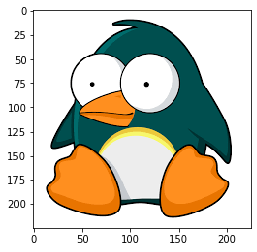

Number of unique colors present in original (clusters):  120
Reconstructed image (using 120 clusters):


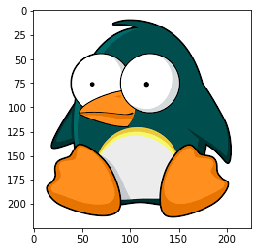

Cluster centers: 
[[ 2.55000000e+02  2.55000000e+02  2.55000000e+02  2.55000000e+02]
 [ 1.67403869e-11  7.90000000e+01  7.90000000e+01  2.55000000e+02]
 [ 2.55000000e+02  1.43000000e+02  3.10000000e+01  2.55000000e+02]
 [ 4.60000000e+01  4.60000000e+01  4.60000000e+01  2.55000000e+02]
 [ 1.94000000e+02  1.94000000e+02  1.94000000e+02  2.55000000e+02]
 [ 5.42854650e-12  3.09796633e-12 -5.96855898e-13  2.55000000e+02]
 [ 2.32000000e+02  1.16000000e+02 -2.61479727e-12  2.55000000e+02]
 [ 2.35000000e+02  2.00000000e+02  6.00000000e+01  2.55000000e+02]
 [ 2.37000000e+02  2.37000000e+02  2.37000000e+02  2.55000000e+02]
 [ 1.45000000e+02  1.45000000e+02  1.45000000e+02  2.55000000e+02]
 [ 1.45000000e+02  7.20000000e+01 -1.13686838e-13  2.55000000e+02]
 [ 2.47000000e+02  2.47000000e+02  1.08000000e+02  2.55000000e+02]
 [ 1.13686838e-13  4.40000000e+01  4.40000000e+01  2.55000000e+02]
 [ 9.80000000e+01  9.80000000e+01  9.80000000e+01  2.55000000e+02]
 [ 2.14000000e+02  2.18000000e+02  2.2100000

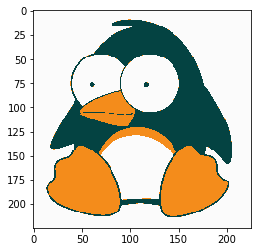

Cluster centers: 
[[251.32568088 251.42871138 251.36607668 255.        ]
 [  4.63535455  67.21741125  66.58590955 255.        ]
 [244.33651945 140.40386728  27.89145243 255.        ]]


In [3]:
# Display simple image
im = io.imread('https://s3.amazonaws.com/aq-web-library/cartoon.png')
plt.imshow(im/np.max(im))
print("Original image: ")
plt.show()

# Format data
m, n = im.shape[:2]
num_channels = im.shape[2]
data = im.reshape(m*n, num_channels)
data = np.array(data, dtype = float)

# Your code here

colors_present = []
for i in range(0,len(data)):
    data_entry = (data[i,0],data[i,1],data[i,2])
    colors_present.append(data_entry)

num_clusters = len(set(colors_present)) 

print("Number of unique colors present in original (clusters): ", num_clusters)
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(data) 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
new_data = np.zeros((225*225, num_channels))
for i in range(0,225*225):
    current_centroid = labels[i]
    for j in range(0,num_channels):        
        new_data[i,j] = centroids[current_centroid,j]
new_data_reshaped = new_data.reshape((225,225,num_channels))
new_data_reshaped = new_data_reshaped.astype(int)
print("Reconstructed image (using", num_clusters, "clusters):")
plt.imshow(new_data_reshaped)
plt.show()

# print kmeans.cluster_centers_

print("Cluster centers: ")
print(centroids)

num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(data) 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
new_data = np.zeros((225*225, num_channels))
for i in range(0,225*225):
    current_centroid = labels[i]
    for j in range(0,num_channels):        
        new_data[i,j] = centroids[current_centroid,j]
new_data_reshaped = new_data.reshape((225,225,num_channels))
new_data_reshaped = new_data_reshaped.astype(int)
print("Reconstructed image (using", num_clusters, "clusters):")
plt.imshow(new_data_reshaped)
plt.show()

# print kmeans.cluster_centers_

print("Cluster centers: ")
print(centroids)



# Problem 2

### Statement of Problem:

* What was the percentage of male gymnasts among all the male participants of the 2000 Olympics? 

Hint:* drop duplicated sportsmen, count only unique ones. 

### Solution:

There were 6576 male entrants to the 2000 Olympics (duplicates removed), and 97 of them were gymnasts, for a percentage of `.01475`.

In [4]:
resp = urlopen("https://s3.amazonaws.com/aq-web-library/athlete_events.csv.zip")
zipfile = ZipFile(BytesIO(resp.read()))
df = pd.read_csv(zipfile.open('athlete_events.csv'))

olympics_2000_male = df[(df['Year'] == 2000) & (df['Sex'] == 'M')]
olympics_2000_male = olympics_2000_male[['Name','Sport']]
num_unique_names = len(np.unique(olympics_2000_male['Name']))
print("Total males in 2000 Olympics (duplicate names removed): ", num_unique_names)

olympics_2000_male_gymnasts = olympics_2000_male[olympics_2000_male['Sport'] == "Gymnastics"]
num_unique_gymnasts = len(np.unique(olympics_2000_male_gymnasts['Name']))

print("Total male gymnasts in 2000 Olympics (duplicate names removed): ",num_unique_gymnasts)

print("Percentage of gymnasts among males in 2000 Olympics: ", num_unique_gymnasts/num_unique_names)

Total males in 2000 Olympics (duplicate names removed):  6576
Total male gymnasts in 2000 Olympics (duplicate names removed):  97
Percentage of gymnasts among males in 2000 Olympics:  0.014750608272506082


# Problem 3

### Statement of Problem:

What age category did the fewest and the most participants of the 2014 Olympics belong to?
- [45-55] and [25-35) correspondingly
- [45-55] and [15-25) correspondingly
- [35-45) and [25-35) correspondingly
- [45-55] and [35-45) correspondingly

### Solution:

The number (with duplicates removed) of 2014 participants in each of these age brackets are as follows:

[15,25): 1193 participants

[25,35): 1396 participants

[35,45): 150 participants

[45,55]: 5 participants

In [5]:
resp = urlopen("https://s3.amazonaws.com/aq-web-library/athlete_events.csv.zip")
zipfile = ZipFile(BytesIO(resp.read()))
df = pd.read_csv(zipfile.open('athlete_events.csv'))

#my code:

olympics_2014 = df[df['Year'] == 2014][['Name','Age']]
participant_names = list(olympics_2014['Name'])
    
unique_names = list(np.unique(participant_names))

num_in_15_25 = 0
num_in_25_35 = 0
num_in_35_45 = 0
num_in_45_55 = 0

for name in unique_names:
    new_df = olympics_2014[olympics_2014['Name'] == name]
    age = new_df.iloc[0]['Age']
    if age >= 15 and age < 25:
        num_in_15_25 = num_in_15_25 + 1
    elif age >= 25 and age < 35:
        num_in_25_35 = num_in_25_35 + 1
    elif age >= 35 and age < 45:
        num_in_35_45 = num_in_35_45 + 1
    elif age >= 45 and age <= 55:
        num_in_45_55 = num_in_45_55 + 1
    else:
        pass

print("Number of 2014 participants in [15,25) age bracket: ", num_in_15_25)
print("Number of 2014 participants in [25,35) age bracket: ", num_in_25_35)
print("Number of 2014 participants in [35,45) age bracket: ", num_in_35_45)
print("Number of 2014 participants in [45,55] age bracket: ", num_in_45_55)

Number of 2014 participants in [15,25) age bracket:  1193
Number of 2014 participants in [25,35) age bracket:  1396
Number of 2014 participants in [35,45) age bracket:  150
Number of 2014 participants in [45,55] age bracket:  5


# Problem 4

### Statement of Problem:

There are 7 people in the room. Each of them individually can correctly determine whether the ball inside box is red or white with 80% probability. How likely is the all will make a correct prediction jointly if the decision is made by majority voting?

### Solution:

Assuming that the votes are independent, the probability that exactly $n$ out of the $7$ people will vote correctly follows the binomial distribution
\begin{equation*}
p(n) = {7 \choose n}(.8)^n(.2)^{7-n}
\end{equation*}
We need to know the probability that at least $4$ of them will vote correctly, which is
\begin{equation*}
p(4) + p(5) + p(6) + p(7) = .966656 
\end{equation*}

In [6]:
import sympy as sp

def p(n):
    return sp.binomial(7,n)*(.8)**n*(.2)**(7-n)

print(p(4) + p(5) + p(6) + p(7))

0.966656000000000


# Problem 5

### Statement of problem:

Find the value of $\partial f/\partial x$ is from network below

Hint: X and + are operators inside nodes

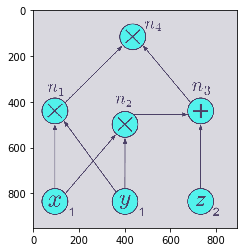

In [15]:
im = io.imread('https://s3.amazonaws.com/aq-web-library/test1.png')
plt.imshow(im/np.max(im))
plt.show()

### Solution:

I am assuming here that $\times$ and $+$ are unknown differentiable operators of two scalar arguments $t_1$ and $t_2$, and that $x,y$ and $z$ are scalar arguments.

Let $X = X(t_1,t_2)$ denote the operator $\times$, and let $P = P(t_1,t_2)$ denote the operator $+$.  Then we can write the node $n_4$ as a function of $x,y$ and $z$ as
\begin{equation*}
\begin{split}
n_4 &= X(n_1,n_3) \\
&= X(X(x,y), P(n_2,z)) \\
&= X(X(x,y), P(X(x,y),z)) \\
\end{split}
\end{equation*}
Then
\begin{equation*}
\begin{split}
\frac{\partial f}{\partial x} &= \frac{\partial n_4}{\partial x} \\
&= \frac{\partial X(X(x,y), P(X(x,y),z)))}{\partial x} \\
&= \left( \frac{\partial X}{\partial t_1} \right) \left( \frac{\partial X(x,y)}{\partial x} \right) + \left( \frac{\partial X}{\partial t_2} \right) \left( \frac{\partial P(X(x,y),z)}{\partial x} \right) \\
&= \left( \frac{\partial X}{\partial t_1} \right)^2 + \left( \frac{\partial X}{\partial t_2} \right) \left( \frac{\partial P}{\partial t_1} \right) \left( \frac{\partial X}{\partial t_1} \right)
\end{split}
\end{equation*}

# Problem 6

### Statement of problem:

Multinomial Logistic Regression

* Using logistic regression predict classes by subsetting explanatory variable (shouldn't be all variables) with accuracy, precision and recall score and explain what you understood by scores

* How would you avoid overfitting

### Solution:

There are 13 potential predictors, giving $2^{13} = 8192$ possible subsets of predictors, and it is not feasible to model all of them.  Instead we will use recursive feature elemination (`RFE`) to obtain the best collection of $n$ features for $n=1,2, \dots, 13$, and then use $5$-fold cross validation (`KFold`) to evaluate these $13$ models to choose the best one.

There are essentially no free parameters in a multinomial logistic regression model, and so once one has decided to use such a model, the only tools available to prevent overfitting are to cross-validate, or to use some type of adjusted metric that penalizes the presence of more predictors.  We have chosen to use the former here.

One could also examine the variance of these cross-validated metrics; there is some randomness in the `KFold` algorithm (the data is shuffled before choosing the folds), returning different cross-validate values for different runs, and obviously lower variance values are to be preferred.  However, just by visual examination of the returned values, the variance of these estimates seems very low, and the same collection of predictors seems to be chosen with high frequencey, so we will just go by this.

RESULTS: Results are summarized in the dataframe `summary_df`.  There are 13 rows, one for each number of predictors from $1$ to $13$.  The `True/False` entries indicate whether or not the `RFE` algorithm chose that predictor for that particular model.  The `accuracy`, `precision`, `recall` and `F1` columns give cross-validated values for these scores.

Due to the randomness of the `KFold` algorithm, somewhat different `summary_df` data frames may be generated with the same code, giving somewhat different numbers of optimal predictors for these metrics.  However, for the majority of runs, either $10$ or $11$ predictors were chosen as optimal, never less than $10$, and the specific predictors chosen were highly invariable.  

In the interest of parsimony, we recommend the following predictors be thrown out for a final model: `magnesium`, `nonflavanoid_phenols`, and `proline`.

In [36]:
resp = urlopen("https://s3.amazonaws.com/aq-web-library/data.csv.zip")
zipfile_ = ZipFile(BytesIO(resp.read()))
df_log = pd.read_csv(zipfile_.open('data.csv'))

# our code:

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

features = list(df_log.iloc[:,1:15].columns)

df_predictors = df_log.iloc[:,1:15]
df_response = df_log.iloc[:,0]

df_selected_subsets = pd.DataFrame({'num_features':range(1,14)})
for feature in features:
    df_selected_subsets[feature] = None

df_selected_subsets['accuracy'] = None
df_selected_subsets['precision'] = None
df_selected_subsets['recall'] = None
df_selected_subsets['F1-score'] = None

model = LogisticRegression(random_state=0, solver='lbfgs',multi_class = 'multinomial', max_iter = 5000)

for num_features in range(1,14):
    rfe = RFE(model,num_features)
    fit = rfe.fit(df_predictors, df_response)
    selected_features = fit.support_
    j = 0
    for feature in features:
        df_selected_subsets.loc[df_selected_subsets['num_features'] == num_features,feature] = selected_features[j]
        j=j+1
        
num_folds = 5
        
for num_features in range(1,14):
    selected_features_boolean = df_selected_subsets.loc[df_selected_subsets['num_features'] == num_features, features]
    L = selected_features_boolean.values.tolist()[0]
    selected_features = []
    j = -1
    for x in L:
        j = j+1
        if x:
            selected_features.append(features[j])
    df_train = df_predictors[selected_features]
    kf = KFold(n_splits=num_folds, shuffle = True)
    gen = kf.split(df_train)
    cumm_precision = 0
    cumm_recall = 0
    cumm_accuracy = 0
    for fold in range(0,num_folds):
        L = next(gen)
        train_indices = L[0]
        test_indices = L[1]
        Xtrain = df_train.iloc[train_indices]
        Xtest = df_train.iloc[test_indices]
        Ytrain = df_response.iloc[train_indices]
        Ytest = df_response.iloc[test_indices]
        model = LogisticRegression(random_state=0, solver='lbfgs', \
                multi_class='multinomial', max_iter = 5000).fit(Xtrain,Ytrain)
        preds = model.predict(Xtest)
        cm = confusion_matrix(Ytest, preds)
        recall = np.mean(np.diag(cm) / np.sum(cm, axis = 1))
        precision = np.mean(np.diag(cm) / np.sum(cm, axis = 0))
        accuracy = sum(np.diag(cm))/sum(sum(cm))
        cumm_precision = cumm_precision + precision
        cumm_recall = cumm_recall + recall
        cumm_accuracy = cumm_accuracy + accuracy
    F1 = 2*(cumm_precision/num_folds)*(cumm_recall/num_folds)/(cumm_precision/num_folds + cumm_recall/num_folds)
    df_selected_subsets.loc[df_selected_subsets['num_features'] == num_features,"precision"] = cumm_precision/num_folds
    df_selected_subsets.loc[df_selected_subsets['num_features'] == num_features,"recall"] = cumm_recall/num_folds  
    df_selected_subsets.loc[df_selected_subsets['num_features'] == num_features,"accuracy"] = cumm_accuracy/num_folds
    df_selected_subsets.loc[df_selected_subsets['num_features'] == num_features,"F1-score"] = F1 
    
summary_df = df_selected_subsets

best_F1 = max(summary_df['F1-score'])
best_accuracy = max(summary_df['accuracy'])
best_num_predictors_F1 = list(summary_df['F1-score']).index(best_F1)+1
best_num_predictors_accuracy = list(summary_df['accuracy']).index(best_accuracy)+1
print("Best number of predictors based on F1-score: ", best_num_predictors_F1)
print("Best number of predictors based on accuracy :", best_num_predictors_accuracy)
summary_df


Best number of predictors based on F1-score:  10
Best number of predictors based on accuracy : 10


,num_features,alcohol,malic_acid,ash,alcalinity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color,hue,od,proline,accuracy,precision,recall,F1-score
0,1,False,False,False,False,False,False,True,False,False,False,False,False,False,0.803968,0.81091,0.818196,0.814536
1,2,True,False,False,False,False,False,True,False,False,False,False,False,False,0.927143,0.928418,0.931807,0.93011
2,3,True,False,False,False,False,False,True,False,False,False,False,True,False,0.910317,0.914588,0.91772,0.916152
3,4,True,False,True,False,False,False,True,False,False,False,False,True,False,0.904444,0.905074,0.915106,0.910062
4,5,True,False,True,False,False,False,True,False,False,True,False,True,False,0.943651,0.942881,0.950286,0.946569
5,6,True,False,True,False,False,True,True,False,False,True,False,True,False,0.932698,0.9364,0.938453,0.937425
6,7,True,False,True,False,False,True,True,False,False,True,True,True,False,0.938095,0.941439,0.942947,0.942193
7,8,True,True,True,False,False,True,True,False,False,True,True,True,False,0.938254,0.938642,0.935667,0.937152
8,9,True,True,True,False,False,True,True,False,True,True,True,True,False,0.938095,0.939858,0.940182,0.94002
9,10,True,True,True,True,False,True,True,False,True,True,True,True,False,0.960952,0.960427,0.964125,0.962272


# Problem 7

**Problem**

Predict presence or absence of cardiovascular disease using the patient examination results.

**Data description**


| Feature | Variable Type | Variable      | Value Type |
|---------|--------------|---------------|------------|
| Age | Objective Feature | age | int (days) |
| Height | Objective Feature | height | int (cm) |
| Weight | Objective Feature | weight | float (kg) |
| Gender | Objective Feature | gender | categorical code |
| Systolic blood pressure | Examination Feature | ap_hi | int |
| Diastolic blood pressure | Examination Feature | ap_lo | int |
| Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
| Smoking | Subjective Feature | smoke | binary |
| Alcohol intake | Subjective Feature | alco | binary |
| Physical activity | Subjective Feature | active | binary |
| Presence or absence of cardiovascular disease | Target Variable | cardio | binary |


Task:
* use dummy-encoding or One Hot Encoding (OHE), Feature Engineering
* Split data into train and holdout parts in the proportion of 70%/30% using sklearn.model_selection.train_test_split with random_state=1, into X_train, X_valid, y_train, y_valid

In [7]:
resp = urlopen("https://s3.amazonaws.com/aq-web-library/data1.csv.zip")
zipfile_ = ZipFile(BytesIO(resp.read()))
df_dt = pd.read_csv(zipfile_.open('data1.csv'),index_col='id', sep=';')
df_dt.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [8]:
from sklearn.model_selection import train_test_split

y = df_dt['cardio']
X = df_dt.iloc[:,0:(len(df_dt.columns)-1)]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.30, random_state=1)

#### 7.1 
Train the decision tree on the dataset (X_train, y_train) with max depth equals to 3 and random_state=20.
* What 3 features are used to make predictions in the created decision tree? Calculate accuracy.

##### Solution:

The features used in this tree are `ap_hi`, `age` and `cholesterol`, as show in the below diagram.  Accuracy (on validation data) for this model is .7275.

In [10]:
# your code here

from sklearn import tree
from sklearn.tree.export import export_text

clf = tree.DecisionTreeClassifier(max_depth = 3,random_state = 20)
clf = clf.fit(X_train, y_train)

r = export_text(clf, feature_names = list(X_train.columns))

print("Decision Tree Diagram: ", "\n")
print(r)

preds = list(clf.predict(X_valid))
accuracy = sum(preds == y_valid)/len(y_valid)

print("Accuracy on validation data: ", accuracy)

Decision Tree Diagram:  

|--- ap_hi <= 129.50
|   |--- age <= 20128.50
|   |   |--- cholesterol <= 2.50
|   |   |   |--- class: 0
|   |   |--- cholesterol >  2.50
|   |   |   |--- class: 1
|   |--- age >  20128.50
|   |   |--- cholesterol <= 2.50
|   |   |   |--- class: 0
|   |   |--- cholesterol >  2.50
|   |   |   |--- class: 1
|--- ap_hi >  129.50
|   |--- ap_hi <= 138.50
|   |   |--- cholesterol <= 2.50
|   |   |   |--- class: 1
|   |   |--- cholesterol >  2.50
|   |   |   |--- class: 1
|   |--- ap_hi >  138.50
|   |   |--- ap_hi <= 149.50
|   |   |   |--- class: 1
|   |   |--- ap_hi >  149.50
|   |   |   |--- class: 1

Accuracy on validation data:  0.7275238095238096


#### 7.2
Set up the depth of the tree using cross-validation on the dataset `(X_train, y_train)` in order to increase quality of the model. Use `GridSearchCV` with 5 folds. Fix `random_state=20` and change  `max_depth` from 4 to 8.

* Draw the plot to show how mean accuracy is changing in regards to `max_depth` value on cross-validation.

* Print the best value of `max_depth`. Also compute accuracy on holdout data. 

##### Solution:

Best CV accuracy was acheived with max_depth = 5.  CV accuracy for this model was scored at .731663, accuracy on holdout was scored at 0.72752.

Summary of CV accuracy with max_depth:  

    max_depth  CV_accuracy
0           1     0.713327
1           2     0.713327
2           3     0.725041
3           4     0.727837
4           5     0.731633
5           6     0.731347
6           7     0.730469
7           8     0.730102
8           9     0.728041
9          10     0.725959
10         11     0.723000
 
 Optimal max_depth:  5


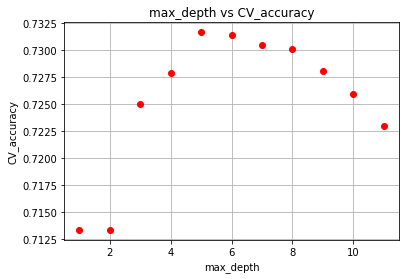

Accuracy of best model on holdout data:  0.7275238095238096


In [11]:
# Your code here

from sklearn.model_selection import GridSearchCV

def mikes_point_plot(xCoordList,yCoordList, xrange = "", yrange="", xLabel = "x", yLabel = "y", 
                     point_styles = [], labels = [], title = "", grid_plot = True,
                    constrained = False):
    xValList = xCoordList
    yValList = yCoordList
    num_plots = len(xCoordList)
    default_styles = ["ro","bs","g^","y--"]
    plot_styles = []
    plot_labels = []
    num_styles = len(point_styles)
    num_labels = len(labels)
    for i in range(0, num_plots):
        if i + 1 <= num_styles:
            plot_styles.append(point_styles[i])
        else:
            plot_styles.append(default_styles[i % len(yValList)])
    for i in range(0, num_plots):
        if i + 1 <= num_labels:
            plot_labels.append(labels[i])
        else:
            plot_labels.append("")
    for i in range(0, num_plots):
        if plot_labels[i] == "":
            plt.plot(xValList[i], yValList[i], plot_styles[i])
        else:
            plt.plot(xValList[i], yValList[i], plot_styles[i], label=plot_labels[i])
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    if (xrange == "" or yrange == ""):
        pass
    else:
        plt.axis([xrange[0], xrange[1], yrange[0], yrange[1]])
    if title == "":
        pass
    else:
        plt.title(title)
    if constrained == True:
        plt.axis("equal")
    if not (len(labels) == 0):
        plt.legend()
    plt.grid(grid_plot)
    plt.show()

model = tree.DecisionTreeClassifier(random_state = 20)

parameters = {'max_depth':range(1,12)}
clf = GridSearchCV(model, parameters, cv = 5)
clf.fit(X_train,y_train)

#print(sorted(clf.cv_results_.keys()))
#print(clf.cv_results_['mean_test_score'])

summary_df = pd.DataFrame({'max_depth':range(1,12), 'CV_accuracy': list(clf.cv_results_['mean_test_score'])})

print("Summary of CV accuracy with max_depth: ", "\n")

print(summary_df)

optimal_max_depth =  list(summary_df['CV_accuracy']).index(max(list(summary_df['CV_accuracy']))) + 1

print(" \n Optimal max_depth: ", optimal_max_depth)

mikes_point_plot(xCoordList = [[1,2,3,4,5,6,7,8,9,10,11]],yCoordList = [list(summary_df['CV_accuracy'])], \
                  xLabel = "max_depth", yLabel = "CV_accuracy", \
                  title = "max_depth vs CV_accuracy", grid_plot = True, \
                    constrained = False)

clf = tree.DecisionTreeClassifier(max_depth = 3,random_state = 20)
clf = clf.fit(X_train, y_train)

best_model = tree.DecisionTreeClassifier(max_depth = 5,random_state = 20)
best_model = best_model.fit(X_train, y_train)


best_preds = list(best_model.predict(X_valid))
accuracy = sum(preds == y_valid)/len(y_valid)

print("Accuracy of best model on holdout data: ", accuracy)

#### 7.3

What conclusions can you derive from model how does these conclusions fit to your understanding cardiovascular disease

##### Solution:

The decision tree diagram of our best model is illustrated below.  Also shown are the features, ordered by importance as returned by this model.

Least surprising to me is the extremely high importance of `ap_hi`, systolic blood pressure.  I don't know much about heart disease but I know that a high blood pressure means your heart is working harder than normal, putting you at risk for heart trouble.  Also unsurprising was the high importance of `age` (young people don't often have heart attacks, regardless of their physical condition) and `cholesterol` (which is I'm sure why doctors are checking it all of the time).

Most surprising to me was the low importance of `smoke`.  We all know smoking is terrible for your lungs but I was also under the impression that it has a serious ill effect on your overall cardiovascular system.  My guess is that this is probably in fact true, but that the specific feature `cardio` in the data set is referring to a more narrow collection of cardiovascular problems, possible confined to the heart itself (and not the rest of the cardiovascular system), which may not be directly affected by smoking.

In [7]:
features = list(X_train.columns)

feature_importances = list(best_model.feature_importances_)
df_importances = pd.DataFrame({"feature": features, "importance": feature_importances })

r = export_text(best_model, feature_names = list(X_train.columns))
print("Decision Tree Diagram of best model: ", "\n")
print(r)

print(df_importances.sort_values(by=['importance'], ascending = False))

Decision Tree Diagram of best model:  

|--- ap_hi <= 129.50
|   |--- age <= 20128.50
|   |   |--- cholesterol <= 2.50
|   |   |   |--- age <= 15994.50
|   |   |   |   |--- cholesterol <= 1.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- cholesterol >  1.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- age >  15994.50
|   |   |   |   |--- ap_hi <= 119.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- ap_hi >  119.50
|   |   |   |   |   |--- class: 0
|   |   |--- cholesterol >  2.50
|   |   |   |--- gluc <= 2.50
|   |   |   |   |--- weight <= 52.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- weight >  52.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- gluc >  2.50
|   |   |   |   |--- ap_hi <= 117.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- ap_hi >  117.50
|   |   |   |   |   |--- class: 1
|   |--- age >  20128.50
|   |   |--- cholesterol <= 2.50
|   |   |   |--- age <= 22125.50
|   |   |   |   |--- ap_hi <= 119.00
|   |   |   |   | 

# Problem 8

#### Problem:

A unit of equipment operates at a temperature that is known to be closely linked to the ambient temperature.

In [13]:
resp = urlopen("https://s3.amazonaws.com/aq-web-library/daily_temp.csv.zip")
zipfile_ = ZipFile(BytesIO(resp.read()))
daily_temp = pd.read_csv(zipfile_.open('daily_temp.csv'))

#### 8.1 using the following dataframe, construct a time series visual of the equipment temperature 

##### Solution:

Here are five years worth of equipment temperature plotted:

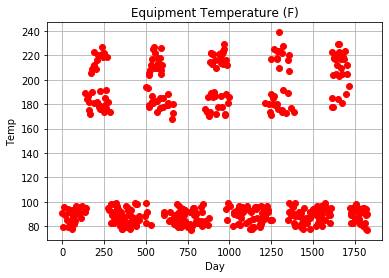

In [14]:
# Your code here

def mikes_point_plot(xCoordList,yCoordList, xrange = "", yrange="", xLabel = "x", yLabel = "y", 
                     point_styles = [], labels = [], title = "", grid_plot = True,
                    constrained = False):
    xValList = xCoordList
    yValList = yCoordList
    num_plots = len(xCoordList)
    default_styles = ["ro","bs","g^","y--"]
    plot_styles = []
    plot_labels = []
    num_styles = len(point_styles)
    num_labels = len(labels)
    for i in range(0, num_plots):
        if i + 1 <= num_styles:
            plot_styles.append(point_styles[i])
        else:
            plot_styles.append(default_styles[i % len(yValList)])
    for i in range(0, num_plots):
        if i + 1 <= num_labels:
            plot_labels.append(labels[i])
        else:
            plot_labels.append("")
    for i in range(0, num_plots):
        if plot_labels[i] == "":
            plt.plot(xValList[i], yValList[i], plot_styles[i])
        else:
            plt.plot(xValList[i], yValList[i], plot_styles[i], label=plot_labels[i])
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    if (xrange == "" or yrange == ""):
        pass
    else:
        plt.axis([xrange[0], xrange[1], yrange[0], yrange[1]])
    if title == "":
        pass
    else:
        plt.title(title)
    if constrained == True:
        plt.axis("equal")
    if not (len(labels) == 0):
        plt.legend()
    plt.grid(grid_plot)
    plt.show()
    
num_years_plotted = 5

yCoords_ambient = list(daily_temp['Ambient Temperature (F)'])
yCoords_equipment = list(daily_temp['Equipment Temperature (F)'])
xCoords = [x for x in range(0,len(yCoords_ambient))]

mikes_point_plot([xCoords[0:num_years_plotted*365]], \
                 [yCoords_equipment[0:num_years_plotted*365]], \
                 title = "Equipment Temperature (F)", xLabel = "Day", yLabel = "Temp")

#### 8.2 Some of the equipmentd data is missing. Based on the available data, fill in the gaps in a sensible way. 

##### Solution:

Below is a plot of five years of ambient and equipment temperature.  Also given is the correlation matrix between ambient and equipment temperature:

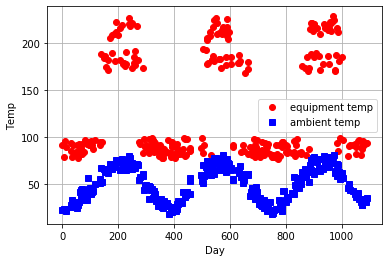

Correlation matrix:


,Ambient Temperature (F),Equipment Temperature (F)
Ambient Temperature (F),1.000000,0.848051
Equipment Temperature (F),0.848051,1.000000


In [15]:
num_years_plotted = 3

mikes_point_plot([xCoords[0:num_years_plotted*365],xCoords[0:num_years_plotted*365]], \
                 [yCoords_equipment[0:num_years_plotted*365],yCoords_ambient[0:num_years_plotted*365]], \
                 labels = ["equipment temp","ambient temp"],xLabel = "Day", yLabel = "Temp")

print("Correlation matrix:")
daily_temp.corr()

We can make/draw the following assumptions/conclusions:

* ambient temperature can be modeled approximately by a sinusoidal curve (this is a known fact of nature anyway)
* the equipment seems to be operating in three very different modes (clusters of temperature values), as can be seen in the above figure.  Denote by `cluster1` points where the equipment temperature is below 150, `cluster2` where it is between 150 and 200, and `cluster3` where it is above 200.  By examing these clusters individually, it can be seen that, almost invariably, the corresponding ambient temperatures for points in `cluster1` are below 60 degrees, for `cluster2` they are between 60 and 70 degrees, and for `cluster3` they are above 70 degrees.  

* Thus, we are justified in building three separate linear models of equipment against ambient temperature, one for ambient temperatures below 60, another for between 60 and 70, and another for above 70.

So, we will:

* Build a model of ambient temperature $T_A$ against day $t$ of the form
\begin{equation*}
\begin{split}
T_A = \beta_0 + \beta_1 \sin \left(2 \pi \frac{19}{6940} t \right) + \beta_2 \cos\left(2 \pi \frac{19}{6940} t \right)
\end{split}
\end{equation*}
where $\beta_0$, $\beta_1$ and $\beta_2$ will be estimated using least squares regression. (The term $\frac{19}{6940}$ guarantees that the period is $1$ year, and the presence of both a $\sin$ and $\cos$ term allow the model to choose the phase shift.)

* Impute missing values of $T_A$ using this model

* Divide the data for known equipment temperatures into three clusters, and separately regress them against $T_A$

* To impute missing values to equipment temerature $T_E$, for a given day $t$ with missing data, we need to choose which of the three models to use.  To do this we will use the simple test of ambient temperature described above.


Actual ambient temperature vs that predicted by our model:


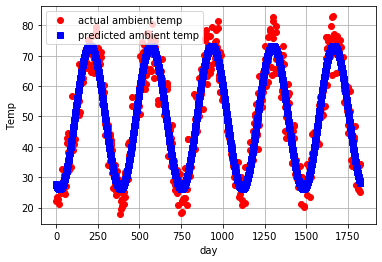

In [16]:
# regress T_A against t sinusoidally

from sklearn.linear_model import LinearRegression

def sinusoid_1(t):
    return np.sin(2*np.pi*19/6940*t)

def sinusoid_2(t):
    return np.cos(2*np.pi*19/6940*t)

y_train_list = []
X_train_list = []

for i in range(0,6940):
    if not(np.isnan(yCoords_ambient[i])):
        X_train_list.append([sinusoid_1(i),sinusoid_2(i)])
        y_train_list.append(yCoords_ambient[i])
        
X_train = np.array(X_train_list)
y_train = np.array(y_train_list)

fit = LinearRegression().fit(X_train,y_train)

print("Actual ambient temperature vs that predicted by our model:")

def ambient_model_func(t):
    return fit.intercept_ + (fit.coef_[0])*sinusoid_1(t) + (fit.coef_[1])*sinusoid_2(t)
        
num_years_plotted = 5
yCoords_predicted = [ambient_model_func(t) for t in xCoords[0:num_years_plotted*365]]
mikes_point_plot([xCoords[0:num_years_plotted*365],xCoords[0:num_years_plotted*365]], \
                 [yCoords_ambient[0:num_years_plotted*365],yCoords_predicted], \
                 labels = ["actual ambient temp","predicted ambient temp"],xLabel = "day", yLabel = "Temp")

Plot of ambient temperature, with imputed values:


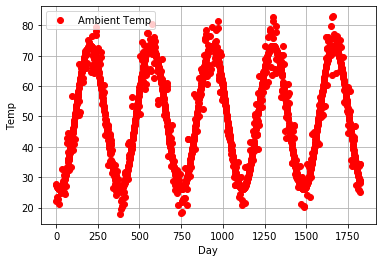

In [17]:
# impute missing values to ambient temperature

df_imputed = daily_temp.copy()

for i in range(0,6940):
    if np.isnan(df_imputed.loc[i,"Ambient Temperature (F)"]):
        df_imputed.loc[i,"Ambient Temperature (F)"] = ambient_model_func(i)

df_imputed['Day'] = [i for i in range(0,6940)]
        
print("Plot of ambient temperature, with imputed values:")

num_years_plotted = 5

mikes_point_plot([xCoords[0:num_years_plotted*365]], \
                 [list(df_imputed['Ambient Temperature (F)'])[0:num_years_plotted*365]], \
                 xLabel = "Day",yLabel="Temp", labels = ["Ambient Temp"])

In [18]:
# divide data into three clusters, regress on the individual clusters, impute missing values
# for equipment temperature

def which_cluster(temp):
    if np.isnan(temp):
        return 0
    if temp < 150:
        return 1
    if (temp >= 150) and (temp < 200):
        return 2
    else:
        return 3
    
df_imputed['cluster'] = [which_cluster(x) for x in df_imputed['Equipment Temperature (F)']]

df_imputed_class1 = df_imputed[df_imputed['cluster'] == 1].copy()
df_imputed_class2 = df_imputed[df_imputed['cluster'] == 2].copy()
df_imputed_class3 = df_imputed[df_imputed['cluster'] == 3].copy()

X_train_class1 = list(df_imputed_class1['Ambient Temperature (F)'])
y_train_class1 = list(df_imputed_class1['Equipment Temperature (F)'])

X_train_class1 = np.array([[x] for x in X_train_class1])
y_train_class1 = np.array(y_train_class1)

fit_class1 = LinearRegression().fit(X_train_class1,y_train_class1)

X_train_class2 = list(df_imputed_class2['Ambient Temperature (F)'])
y_train_class2 = list(df_imputed_class2['Equipment Temperature (F)'])

X_train_class2 = np.array([[x] for x in X_train_class2])
y_train_class2 = np.array(y_train_class2)

fit_class2 = LinearRegression().fit(X_train_class2,y_train_class2)

X_train_class3 = list(df_imputed_class3['Ambient Temperature (F)'])
y_train_class3 = list(df_imputed_class3['Equipment Temperature (F)'])

X_train_class3 = np.array([[x] for x in X_train_class3])
y_train_class3 = np.array(y_train_class3)

fit_class3 = LinearRegression().fit(X_train_class3,y_train_class3)

def model_class1(T):
    return fit_class1.predict(np.array([[T]]))[0]

def model_class2(T):
    return fit_class2.predict(np.array([[T]]))[0]

def model_class3(T):
    return fit_class3.predict(np.array([[T]]))[0]

def ensemble_model(T):
    if T <= 60:
        return model_class1(T)
    if T > 60 and T <= 70:
        return model_class2(T)
    if T > 70:
        return model_class3(T)

df_imputing_equipment_temp = df_imputed.copy()

for i in range(0,len(df_imputing_equipment_temp.index)):
    if df_imputing_equipment_temp.loc[i,'cluster'] == 0:
        ambient_temp = df_imputing_equipment_temp.loc[i,'Ambient Temperature (F)']
        df_imputing_equipment_temp.loc[i,'Equipment Temperature (F)'] = ensemble_model(ambient_temp)

df_finished = df_imputing_equipment_temp

print("Finished dataframe with imputed values:")

df_finished.head(30)

Finished dataframe with imputed values:


,Date,Ambient Temperature (F),Equipment Temperature (F),Day,cluster
0,2000-01-01,27.632512,86.978357,0,0
1,2000-01-02,22.000000,91.000000,1,1
2,2000-01-03,27.365150,86.948884,2,0
3,2000-01-04,27.241376,86.935240,3,0
4,2000-01-05,27.124255,86.922329,4,0
5,2000-01-06,27.013822,86.910155,5,0
6,2000-01-07,23.400000,79.000000,6,1
7,2000-01-08,26.813149,86.888034,7,0
8,2000-01-09,26.722969,86.878093,8,0
9,2000-01-10,26.639595,86.868902,9,0


Plot of imputed values over 3 years: 


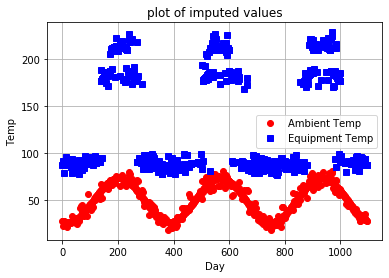

In [19]:
print("Plot of imputed values over 3 years: ")

day_range = [0,3*365]

Xcoords = [i for i in range(day_range[0],day_range[1]+1)]
Ycoords_ambient = list(df_finished['Ambient Temperature (F)'])[day_range[0]:(day_range[1]+1)]
Ycoords_equipment = list(df_finished['Equipment Temperature (F)'])[day_range[0]:(day_range[1]+1)]

mikes_point_plot([Xcoords,Xcoords],[Ycoords_ambient,Ycoords_equipment], xLabel = "Day", yLabel = "Temp", \
                labels = ["Ambient Temp","Equipment Temp"], title = "plot of imputed values")

# Problem 9

### Statement of problem:

Three files contain 30 days of data collected in January 2019. Merge into a single dataframe.

### Solution:

The merged dataframe is `merged_df`.  The `Day` column denotes the day of the month.  

In [20]:
resp = urlopen("https://s3.amazonaws.com/aq-web-library/files.zip")
zipfile_ = ZipFile(BytesIO(resp.read()))
files1 = pd.read_csv(zipfile_.open('file1.csv'))
files2 = pd.read_csv(zipfile_.open('file2.csv'))
files3 = pd.read_csv(zipfile_.open('file3.csv'))

#my code:

files1_day = list(files1['Day'])
files1_day = [x[4:6] for x in files1_day]

def append_zero(x):
    if len(x) == 1:
        return "0" + x
    else:
        return x

files1_day = [append_zero(x) for x in files1_day]
files1['Day'] = files1_day

files2_day = list(files2['time_stamp'])
files2_day = [x[8:10] for x in files2_day]
files2.columns = ['Day','PAR3']
files2['Day'] = files2_day

day_list = files1_day
day_list.sort()

merged_df = pd.DataFrame({'Day':day_list})

merged_df['PAR1'] = None
merged_df['PAR2'] = None
merged_df['PAR3'] = None
merged_df['PAR4'] = None
merged_df['PAR5'] = None

for day in day_list:
    files1_index = list(files1['Day']).index(day)
    par1 = files1.iloc[files1_index]['PAR1']
    par2 = files1.iloc[files1_index]['PAR2']
    merged_df.loc[merged_df['Day'] == day, 'PAR1'] = par1
    merged_df.loc[merged_df['Day'] == day, 'PAR2'] = par2
    
    files2_index = list(files2['Day']).index(day)
    par3 = files2.iloc[files2_index]['PAR3']
    merged_df.loc[merged_df['Day'] == day, 'PAR3'] = par3
    
    files3_index = list(files3['PAR1']).index(par1)
    par4 = files3.iloc[files3_index]['PAR4']
    par5 = files3.iloc[files3_index]['PAR5']
    merged_df.loc[merged_df['PAR1'] == par1, 'PAR4'] = par4
    merged_df.loc[merged_df['PAR1'] == par1, 'PAR5'] = par5
        
merged_df

,Day,PAR1,PAR2,PAR3,PAR4,PAR5
0,01,A12,108,14,631,-99
1,02,B12,107,17,531,-64
2,03,C3,103,15,526,-82
3,04,74,102,14,643,-52
4,05,44,105,19,500,78
5,06,2313,106,14,490,15
6,07,18,100,10,52,77
7,08,99,103,17,753,43
8,09,10A1,104,15,916,16
9,10,AqQ,100,12,916,-51


# Problem 10

### Statement of problem:

Six predictor fields (P1, P2, P3, P4, P5, P6) and one target T field are available in the file train_regression.csv

* Fit a regresion model that will predict T in new data. 

In [23]:
resp = urlopen("https://s3.amazonaws.com/aq-web-library/train_regression.csv.zip")
zipfile_ = ZipFile(BytesIO(resp.read()))
train_regression = pd.read_csv(zipfile_.open('train_regression.csv'))

In [24]:
df = train_regression

### Solution:

This is a very open-ended problem, one that would deserve a great deal of attention in a real-world context.  For purposes of this test I will outline some first steps that I would take in tackling this data set, and then mention some further steps I would take if I were tackling this problem in the real world.

Basically, we'll start by visualizing and summarizing the data, and then we'll look at some basic out-of-the-box regression models, to get a baseline idea of what we might hope for in terms of final model performance. 

Since we're going to be looking at a lot of different models, we'll collect several of them into the convenient wrapper class `mikes_regression_modeling_class`:

In [25]:
import sklearn

class mikes_regression_modeling_class:
    def __init__(self, df, response):
        predictors = list(df.columns)
        if not(response in predictors):
            raise RuntimeError("Error, in mikes_regression_methods, response not present in dataframe")        
        predictors.remove(response)
        response_df = df[response].copy()
        predictors_df = df[predictors].copy()
        self.df = df
        self.response_df = response_df
        self.predictors_df = predictors_df
        self.predictors = predictors
        self.response = response
        self.models = []
        self.model_names = []
        self.dtypes = predictors_df.dtypes
    def show_plots(self, predictors = "all"):
        if predictors == "all":
            predictors = self.predictors
        for predictor in predictors:
            Xcoords = self.predictors_df[predictor]
            Ycoords = list(self.response_df)
            mikes_point_plot([Xcoords],[Ycoords], \
                xLabel = predictor, yLabel = self.response, point_styles = ['bo'])
    def show_histogram(self, num_bins = 30):
        plt.hist(self.response_df, num_bins, facecolor='blue', alpha=0.5, edgecolor='black', linewidth=1.5)
        plt.ylabel("Count")
        plt.xlabel(self.response + " values")
        plt.show()
    def linear_regression(self,predictors = "all", model_name = "linear_regression"):
        if predictors == "all":
            predictors = self.predictors
        X_train = self.predictors_df[predictors]
        X_train = pd.get_dummies(X_train)
        X_train = X_train.values
        Y_train = self.response_df.values
        fit = sklearn.linear_model.LinearRegression().fit(X_train,Y_train)
        self.model_names.append(model_name)
        self.models.append(fit)
    def polynomial_regression(self, degree = 2, predictors = "all", interaction_only=False, \
            model_name = "polynomial_regression"):
        if predictors == "all":
            predictors = self.predictors
        X_train = self.predictors_df[predictors]
        X_train = pd.get_dummies(X_train)
        X_train = X_train.values
        Y_train = self.response_df.values
        poly = sklearn.preprocessing.PolynomialFeatures(degree = degree)
        X_train = poly.fit_transform(X_train)
        fit = sklearn.linear_model.LinearRegression().fit(X_train,Y_train)
        self.model_names.append(model_name)
        self.models.append(fit)
    def ridge_regression(self, alpha = 1.0, predictors = "all", \
            model_name = "ridge_regression", normalize = True):
        if predictors == "all":
            predictors = self.predictors
        X_train = self.predictors_df[predictors]
        X_train = pd.get_dummies(X_train)
        X_train = X_train.values
        Y_train = self.response_df.values
        clf = sklearn.linear_model.Ridge(alpha = alpha, normalize = normalize)
        fit = clf.fit(X_train,Y_train)
        self.model_names.append(model_name)
        self.models.append(fit)
    def lasso_regression(self, alpha = 1.0, predictors = "all", \
            model_name = "lasso_regression", normalize = True):
        if predictors == "all":
            predictors = self.predictors
        X_train = self.predictors_df[predictors]
        X_train = pd.get_dummies(X_train)
        X_train = X_train.values
        Y_train = self.response_df.values
        clf = sklearn.linear_model.Lasso(alpha = alpha, normalize = normalize)
        fit = clf.fit(X_train,Y_train)
        self.model_names.append(model_name)
        self.models.append(fit)
    def principal_components_regression(self, alpha = 1.0, predictors = "all", \
            model_name = "principal_components_regression", normalize = True):
        if predictors == "all":
            predictors = self.predictors
        X_train = self.predictors_df[predictors]
        X_train = pd.get_dummies(X_train)
        X_train = X_train.values
        if normalize == True:
            X_train = sklearn.preprocessing.normalize(X_train)
        Y_train = self.response_df.values
        fit = sklearn.linear_model.LinearRegression().fit(X_train,Y_train)
        self.model_names.append(model_name)
        self.models.append(fit)
        
def mikes_point_plot(xCoordList,yCoordList, xrange = "", yrange="", xLabel = "x", yLabel = "y", 
                     point_styles = [], labels = [], title = "", grid_plot = True,
                    constrained = False):
    xValList = xCoordList
    yValList = yCoordList
    num_plots = len(xCoordList)
    default_styles = ["ro","bs","g^","y--"]
    plot_styles = []
    plot_labels = []
    num_styles = len(point_styles)
    num_labels = len(labels)
    for i in range(0, num_plots):
        if i + 1 <= num_styles:
            plot_styles.append(point_styles[i])
        else:
            plot_styles.append(default_styles[i % len(yValList)])
    for i in range(0, num_plots):
        if i + 1 <= num_labels:
            plot_labels.append(labels[i])
        else:
            plot_labels.append("")
    for i in range(0, num_plots):
        if plot_labels[i] == "":
            plt.plot(xValList[i], yValList[i], plot_styles[i])
        else:
            plt.plot(xValList[i], yValList[i], plot_styles[i], label=plot_labels[i])
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    if (xrange == "" or yrange == ""):
        pass
    else:
        plt.axis([xrange[0], xrange[1], yrange[0], yrange[1]])
    if title == "":
        pass
    else:
        plt.title(title)
    if constrained == True:
        plt.axis("equal")
    if not (len(labels) == 0):
        plt.legend()
    plt.grid(grid_plot)
    plt.show()

For purposes of validation we'll holdout 10% of the data:

In [26]:
import random as rand

rand.seed(1978)    #a really good year for me

percent_to_holdout = .10
num_obs = len(df.index)
indices = list(range(0,num_obs))
holdout_indices = rand.sample(indices,int(percent_to_holdout*num_obs))
holdout_indices.sort()
train_indices = [x for x in indices if x not in holdout_indices]

df_train = df.iloc[train_indices]
df_validate = df.iloc[holdout_indices]

Create a `mikes_regression_modeling_class` object from training data:

In [27]:
modeling_object = mikes_regression_modeling_class(df = df_train, response = 'T')

We can start by plotting the response against each of the predictors, examining correlation coefficients, and looking at the distribution of the response:

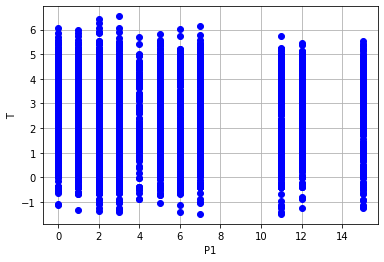

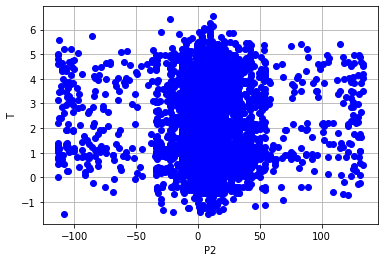

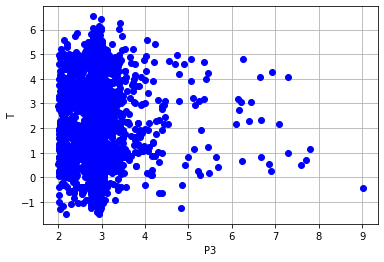

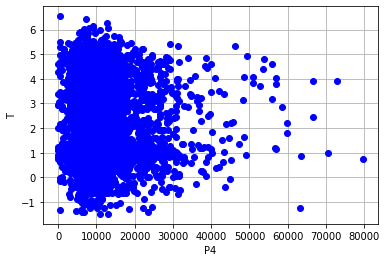

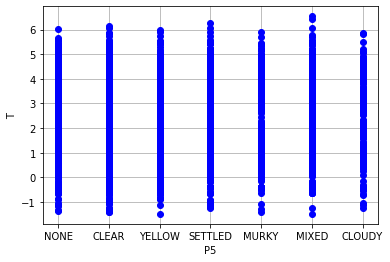

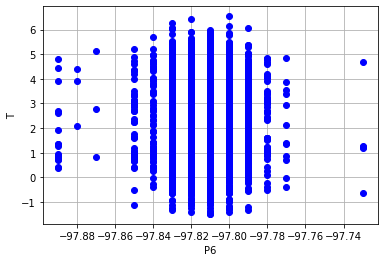

In [28]:
modeling_object.show_plots()

In [29]:
print("Correlation coefficients: ")
df.corr()

Correlation coefficients: 


,P1,P2,P3,P4,P6,T
P1,1.000000,-0.020810,0.015577,-0.002805,-0.004286,-0.021107
P2,-0.020810,1.000000,-0.018303,0.015078,-0.000067,-0.001171
P3,0.015577,-0.018303,1.000000,-0.001182,-0.012116,0.004514
P4,-0.002805,0.015078,-0.001182,1.000000,-0.003211,-0.033591
P6,-0.004286,-0.000067,-0.012116,-0.003211,1.000000,-0.004403
T,-0.021107,-0.001171,0.004514,-0.033591,-0.004403,1.000000


Distribution of target values: 


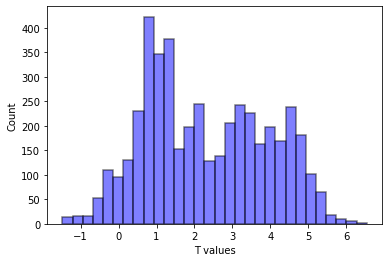

In [30]:
print("Distribution of target values: ")
modeling_object.show_histogram()

Neither the plots nor correlation matrix seem to indicate that the target is particularly correlated with any one of the predictors (and if one of them is, I'm not seeing it).  Also, the target values don't seem to follow a readily recognizeable distribution (and is perhaps multi-modal).  So, let's just throw a bunch of models at the data, validate, and see if any of them stick.  We will try:

* linear regression (all predictors used)
* polynomial regression (second, third and fourth degree)
* ridge regression (with 10 different values of alpha)
* LASSO regression (with 10 different values of alpha)

We will validate using RMSE on the holdout data.

In [31]:
# build the models:

alpha_values = [.2,.4,.6,.8, 1]
degree_values = [2,3,4]

modeling_object.linear_regression()

for degree in degree_values:
    modeling_object.polynomial_regression(degree = degree ,model_name = "polynomial_regression (degree " + \
                                         str(degree) + ")")
    
for alpha in alpha_values:
    modeling_object.ridge_regression(alpha = alpha, model_name = "ridge regression (alpha = " \
                                     + str(alpha) + ")")
    
for alpha in alpha_values:
    modeling_object.lasso_regression(alpha = alpha, model_name = "lasso regression (alpha = " \
                                     + str(alpha) + ")")

In [32]:
# validate models on holdout data:

summary_df = pd.DataFrame()
summary_df['model'] = modeling_object.model_names
summary_df['CV RMSE'] = None

predictors = modeling_object.predictors

import math

def rmse(preds):
    return math.sqrt(sklearn.metrics.mean_squared_error(preds,df_validate['T']))

model_index = 0
eval_df = pd.get_dummies(df_validate[predictors]).values
model = modeling_object.models[model_index]
preds = model.predict(eval_df)
summary_df.loc[model_index,'CV RMSE'] = rmse(preds)

model_index = 1
poly = sklearn.preprocessing.PolynomialFeatures(degree = 2)
eval_df_temp = pd.get_dummies(df_validate[predictors]).values
eval_df = poly.fit_transform(eval_df_temp)
model = modeling_object.models[model_index]
preds = model.predict(eval_df)
summary_df.loc[model_index,'CV RMSE'] = rmse(preds)

model_index = 2
poly = sklearn.preprocessing.PolynomialFeatures(degree = 3)
eval_df_temp = pd.get_dummies(df_validate[predictors]).values
eval_df = poly.fit_transform(eval_df_temp)
model = modeling_object.models[model_index]
preds = model.predict(eval_df)
summary_df.loc[model_index,'CV RMSE'] = rmse(preds)

model_index = 3
poly = sklearn.preprocessing.PolynomialFeatures(degree = 4)
eval_df_temp = pd.get_dummies(df_validate[predictors]).values
eval_df = poly.fit_transform(eval_df_temp)
model = modeling_object.models[model_index]
preds = model.predict(eval_df)
summary_df.loc[model_index,'CV RMSE'] = rmse(preds)

model_index = 4
eval_df = pd.get_dummies(df_validate[predictors]).values
model = modeling_object.models[model_index]
preds = model.predict(eval_df)
summary_df.loc[model_index,'CV RMSE'] = rmse(preds)

model_index = 5
eval_df = pd.get_dummies(df_validate[predictors]).values
model = modeling_object.models[model_index]
preds = model.predict(eval_df)
summary_df.loc[model_index,'CV RMSE'] = rmse(preds)

model_index = 6
eval_df = pd.get_dummies(df_validate[predictors]).values
model = modeling_object.models[model_index]
preds = model.predict(eval_df)
summary_df.loc[model_index,'CV RMSE'] = rmse(preds)

model_index = 7
eval_df = pd.get_dummies(df_validate[predictors]).values
model = modeling_object.models[model_index]
preds = model.predict(eval_df)
summary_df.loc[model_index,'CV RMSE'] = rmse(preds)

model_index = 8
eval_df = pd.get_dummies(df_validate[predictors]).values
model = modeling_object.models[model_index]
preds = model.predict(eval_df)
summary_df.loc[model_index,'CV RMSE'] = rmse(preds)

model_index = 9
eval_df = pd.get_dummies(df_validate[predictors]).values
model = modeling_object.models[model_index]
preds = model.predict(eval_df)
summary_df.loc[model_index,'CV RMSE'] = rmse(preds)

model_index = 10
eval_df = pd.get_dummies(df_validate[predictors]).values
model = modeling_object.models[model_index]
preds = model.predict(eval_df)
summary_df.loc[model_index,'CV RMSE'] = rmse(preds)

model_index = 11
eval_df = pd.get_dummies(df_validate[predictors]).values
model = modeling_object.models[model_index]
preds = model.predict(eval_df)
summary_df.loc[model_index,'CV RMSE'] = rmse(preds)

model_index = 12
eval_df = pd.get_dummies(df_validate[predictors]).values
model = modeling_object.models[model_index]
preds = model.predict(eval_df)
summary_df.loc[model_index,'CV RMSE'] = rmse(preds)

model_index = 13
eval_df = pd.get_dummies(df_validate[predictors]).values
model = modeling_object.models[model_index]
preds = model.predict(eval_df)
summary_df.loc[model_index,'CV RMSE'] = rmse(preds)

print("Standard deviation of target: ", np.std(df_validate['T']))

summary_df



Standard deviation of target:  1.6863354127812178


,model,CV RMSE
0,linear_regression,1.69058
1,polynomial_regression (degree 2),1.68719
2,polynomial_regression (degree 3),1.73368
3,polynomial_regression (degree 4),2.13683
4,ridge regression (alpha = 0.2),1.69016
5,ridge regression (alpha = 0.4),1.68989
6,ridge regression (alpha = 0.6),1.68969
7,ridge regression (alpha = 0.8),1.68954
8,ridge regression (alpha = 1),1.68943
9,lasso regression (alpha = 0.2),1.68854


### Initial conclusions:

Just based on this preliminary analysis, my guess is that there is, in fact, no statistical relationship between the target and the predictors.  None of these models performed above standard deviation (the RMSE you would get by just constantly guessing the mean target value).  The models used in this analysis tend to be fairly robust, in the sense that, if there is any relationship at all, no matter how complicated, these models tend to pick up at least some of the explainable variance.  This did not happen for any of these models.

This of course does not mean that there is no relationship; it could just mean that the models used here were insufficient to pick up on it.

My next course of action would be:

* Ask the client/employer for domain specific knowledge of this data (What is the target actually?  What are the predictors?  Do you have reason to suppose that the predictor(s) are in fact related to the target?)

* Ask the client/employer how important it is that we find such a relationship, if it exists (How does this affect your bottomline?  What are you hoping to accomplish by this?  Is it worth the money you are paying me to spend the extra time trying to find this relationship?)

* Depending on the answers to the above, the next models I would try would be highly non-parametric ones, e.g. k-nearest-neighbors, regression trees, random forests, support vector machines, deep learning models (keras), ensembled versions of any/all of these.